In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

project_path = "/content/drive/MyDrive/AI_Project"
os.makedirs(project_path, exist_ok=True)
os.chdir(project_path)

print("Current working directory:")
print(os.getcwd())


Current working directory:
/content/drive/MyDrive/AI_Project


In [ ]:
!pip install bing-image-downloader


In [ ]:
from bing_image_downloader import downloader
import os

base_dir = "/content/drive/MyDrive/AI_Project/raw_dataset"
os.makedirs(base_dir, exist_ok=True)

classes = [
    "rose flower close up",
    "sunflower flower close up",
    "tulip flower close up"
]

for cls in classes:
    print(f"Downloading: {cls}")
    downloader.download(
        query=cls,
        limit=80,            # smaller & fast
        output_dir=base_dir,
        adult_filter_off=True,
        force_replace=False,
        timeout=30
    )


Downloading: rose flower close up
[%] Downloading Images to /content/drive/MyDrive/AI_Project/raw_dataset/rose flower close up


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://st3.depositphotos.com/1068095/17363/i/1600/depositphotos_173633544-stock-photo-rose-flower-close-up.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.pixabay.com/photo/2017/02/24/14/07/rose-2095172_960_720.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.pixabay.com/photo/2017/11/16/09/11/rose-2953815_1280.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.pixabay.com/photo/2021/07/21/05/17/rose-6482250_1280.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://c8.alamy.com/comp/2J5TN3W/rose-flower-up-close-2J5TN3W.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://img.freepik.com/premium-photo/rose-flower-closeup_1166198-18509.jpg
[%] File Downloaded !

[%] Downloading Image #7 from h

In [ ]:
!pip install opencv-python pillow


In [ ]:
import cv2
import os

IMG_SIZE = 224
dataset_path = "/content/drive/MyDrive/AI_Project/raw_dataset"

removed = 0
processed = 0

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = cv2.imread(img_path)
            if img is None:
                os.remove(img_path)
                removed += 1
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            cv2.imwrite(img_path, img)
            processed += 1

        except:
            os.remove(img_path)
            removed += 1

print(f"✅ Processed images: {processed}")
print(f"🗑️ Removed corrupted images: {removed}")


✅ Processed images: 623
🗑️ Removed corrupted images: 0


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

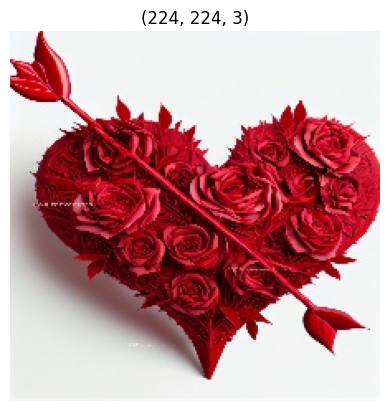

In [ ]:
import matplotlib.pyplot as plt

sample_class = os.listdir(dataset_path)[0]
sample_img = os.listdir(os.path.join(dataset_path, sample_class))[0]

img = cv2.imread(os.path.join(dataset_path, sample_class, sample_img))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(img.shape)
plt.axis("off")


In [ ]:
!pip install split-folders


In [ ]:
import splitfolders
import os

input_folder = "/content/drive/MyDrive/AI_Project/raw_dataset"
output_folder = "/content/drive/MyDrive/AI_Project/dataset"

splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.7, 0.15, 0.15)
)

print("✅ Dataset split completed")


Copying files: 623 files [00:08, 69.24 files/s]

✅ Dataset split completed


In [ ]:
!ls dataset/train


'rose flower'		'rose flower plant'	     'sunflower flower plant'
'rose flower close up'	'sunflower flower close up'  'tulip flower close up'


In [ ]:
for split in ["train", "val", "test"]:
    print(f"\n📂 {split.upper()}")
    for cls in os.listdir(f"dataset/{split}"):
        count = len(os.listdir(f"dataset/{split}/{cls}"))
        print(f"{cls}: {count} images")



📂 TRAIN
rose flower: 101 images
rose flower plant: 84 images
sunflower flower plant: 82 images
rose flower close up: 56 images
sunflower flower close up: 56 images
tulip flower close up: 56 images

📂 VAL
rose flower: 21 images
rose flower plant: 18 images
sunflower flower plant: 17 images
rose flower close up: 12 images
sunflower flower close up: 12 images
tulip flower close up: 12 images

📂 TEST
rose flower: 23 images
rose flower plant: 18 images
sunflower flower plant: 19 images
rose flower close up: 12 images
sunflower flower close up: 12 images
tulip flower close up: 12 images


In [ ]:
import os
os.chdir("/content/drive/MyDrive/AI_Project")
print(os.getcwd())


/content/drive/MyDrive/AI_Project


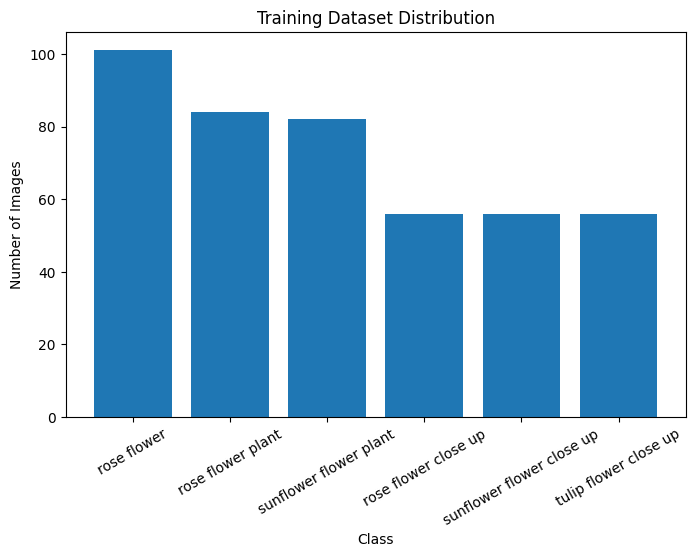

In [ ]:
import matplotlib.pyplot as plt
import os

train_path = "dataset/train"

classes = os.listdir(train_path)
image_counts = [len(os.listdir(os.path.join(train_path, cls))) for cls in classes]

plt.figure(figsize=(8,5))
plt.bar(classes, image_counts)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Training Dataset Distribution")
plt.xticks(rotation=30)
plt.show()


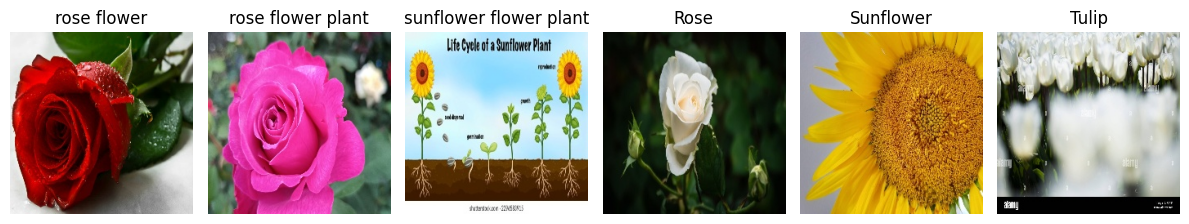

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt
import os

train_path = "dataset/train"

# Mapping nama folder → nama cantik
label_map = {
    "rose flower close up": "Rose",
    "sunflower flower close up": "Sunflower",
    "tulip flower close up": "Tulip"
}

classes = os.listdir(train_path)

plt.figure(figsize=(12,4))

for i, cls in enumerate(classes):
    cls_path = os.path.join(train_path, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(classes), i+1)
    plt.imshow(img)
    plt.title(label_map.get(cls, cls), fontsize=12)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os
print(os.getcwd())


/content/drive/MyDrive/AI_Project


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import time


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "dataset/train"
val_dir   = "dataset/val"
test_dir  = "dataset/test"

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_data.num_classes
print("Number of classes:", NUM_CLASSES)


Found 433 images belonging to 6 classes.
Found 92 images belonging to 6 classes.
Found 94 images belonging to 6 classes.
Number of classes: 6


In [ ]:
base_model = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # Transfer learning

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model_resnet = Model(inputs=base_model.input, outputs=output)

model_resnet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
start_time = time.time()

history_resnet = model_resnet.fit(
    train_data,
    validation_data=val_data,
    epochs=50
)

resnet_time = time.time() - start_time
print(f"⏱️ ResNet50 training time: {resnet_time/60:.2f} minutes")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2112 - loss: 1.8404 - val_accuracy: 0.1848 - val_loss: 1.7697
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.1862 - loss: 1.7705 - val_accuracy: 0.2283 - val_loss: 1.7231
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.2090 - loss: 1.7313 - val_accuracy: 0.2391 - val_loss: 1.7062
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.1757 - loss: 1.7230 - val_accuracy: 0.2283 - val_loss: 1.6950
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.2321 - loss: 1.6818 - val_accuracy: 0.2609 - val_loss: 1.6757
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.3335 - loss: 1.6584 - val_accuracy: 0.2283 - val_loss: 1.6785
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.2920 - loss: 1.6365 - val_accuracy: 0.2935 - val_loss: 1.6626
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.2873 - loss: 1.6638 - val_accuracy: 0.26

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf
import time


In [ ]:
base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # Transfer learning

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model_densenet = Model(inputs=base_model.input, outputs=output)

model_densenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_densenet.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,043,654 (26.87 MB)

 Trainable params: 6,150 (24.02 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
start_time = time.time()

history_densenet = model_densenet.fit(
    train_data,
    validation_data=val_data,
    epochs=50
)

densenet_time = time.time() - start_time
print(f"⏱️ DenseNet121 training time: {densenet_time/60:.2f} minutes")


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.2062 - loss: 1.9565 - val_accuracy: 0.3261 - val_loss: 1.6982
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.4707 - loss: 1.3867 - val_accuracy: 0.4783 - val_loss: 1.3148
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.5585 - loss: 1.0580 - val_accuracy: 0.5326 - val_loss: 1.1675
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.6559 - loss: 0.9022 - val_accuracy: 0.5109 - val_loss: 1.1029
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.6955 - loss: 0.7899 - val_accuracy: 0.5761 - val_loss: 1.0686
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.7477 - loss: 0.7194 - val_accuracy: 0.5652 - val_loss: 1.0216
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.7329 - loss: 0.6821 - val_accuracy: 0.5652 - val_loss: 1.0125
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.7912 - loss: 0.6216 - val_accuracy: 0.56

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf
import time


In [ ]:
base_model = MobileNetV3Large(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # Transfer learning

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model_mobilenet = Model(inputs=base_model.input, outputs=output)

model_mobilenet.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model_mobilenet.summary()


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 112, 112,  │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 113, 113,  │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        256 │ expanded_conv_1_

 Total params: 3,002,118 (11.45 MB)

 Trainable params: 5,766 (22.52 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [ ]:
start_time = time.time()

history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=val_data,
    epochs=50
)

mobilenet_time = time.time() - start_time
print(f"⏱️ MobileNetV3 training time: {mobilenet_time/60:.2f} minutes")


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1231 - loss: 2.0039 - val_accuracy: 0.1522 - val_loss: 1.7901
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.1834 - loss: 1.7768 - val_accuracy: 0.2391 - val_loss: 1.7675
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.2194 - loss: 1.7581 - val_accuracy: 0.2391 - val_loss: 1.7619
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.2348 - loss: 1.7503 - val_accuracy: 0.2283 - val_loss: 1.7516
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.2358 - loss: 1.7459 - val_accuracy: 0.2391 - val_loss: 1.7470
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.2294 - loss: 1.7448 - val_accuracy: 0.2283 - val_loss: 1.7414
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.2291 - loss: 1.7369 - val_accuracy: 0.2283 - val_loss: 1.7362
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.2360 - loss: 1.7218 - val_accuracy: 0.22

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, average_precision_score


In [ ]:
# True labels
y_true = test_data.classes

# Class names
class_names = list(test_data.class_indices.keys())

print("Classes:", class_names)


Classes: ['rose flower', 'rose flower close up', 'rose flower plant', 'sunflower flower close up', 'sunflower flower plant', 'tulip flower close up']


In [ ]:
resnet_loss, resnet_acc = model_resnet.evaluate(test_data)
print(f"ResNet50 Test Accuracy: {resnet_acc*100:.2f}%")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3754 - loss: 1.5605
ResNet50 Test Accuracy: 41.49%


In [ ]:
y_pred_resnet = model_resnet.predict(test_data)
y_pred_resnet_labels = np.argmax(y_pred_resnet, axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [ ]:
resnet_map = average_precision_score(
    tf.keras.utils.to_categorical(y_true),
    y_pred_resnet,
    average="macro"
)

print(f"ResNet50 mAP: {resnet_map:.4f}")


ResNet50 mAP: 0.4236


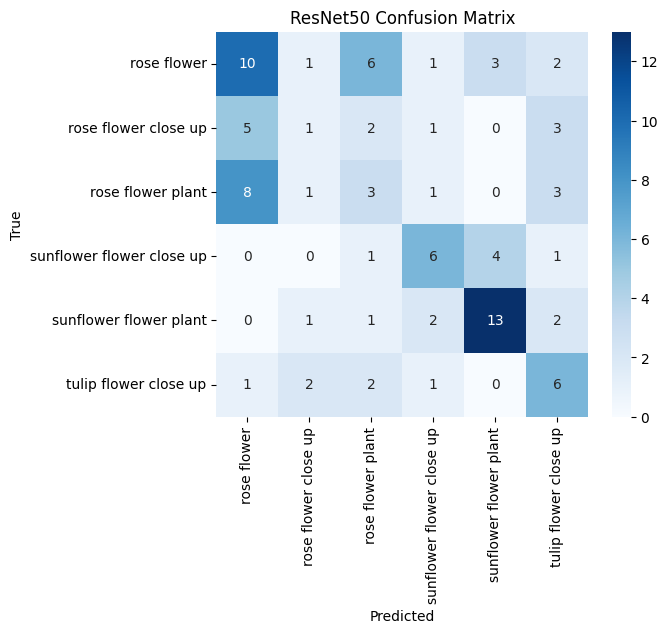

In [ ]:
cm_resnet = confusion_matrix(y_true, y_pred_resnet_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm_resnet, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")
plt.title("ResNet50 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.6018 - loss: 1.0345
DenseNet121 Test Accuracy: 64.89%
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step
DenseNet121 mAP: 0.7144


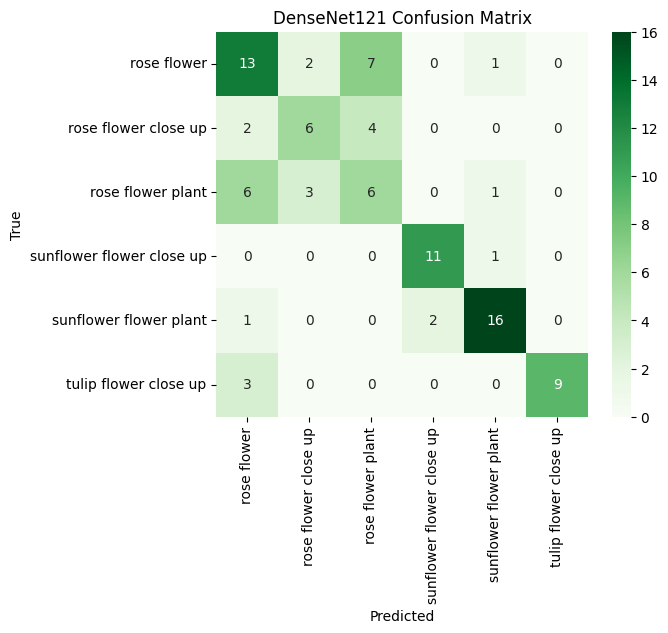

In [ ]:
densenet_loss, densenet_acc = model_densenet.evaluate(test_data)
print(f"DenseNet121 Test Accuracy: {densenet_acc*100:.2f}%")

y_pred_densenet = model_densenet.predict(test_data)
y_pred_densenet_labels = np.argmax(y_pred_densenet, axis=1)

densenet_map = average_precision_score(
    tf.keras.utils.to_categorical(y_true),
    y_pred_densenet,
    average="macro"
)

print(f"DenseNet121 mAP: {densenet_map:.4f}")

cm_densenet = confusion_matrix(y_true, y_pred_densenet_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm_densenet, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Greens")
plt.title("DenseNet121 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.3205 - loss: 1.6359
MobileNetV3 Test Accuracy: 26.60%


1/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
MobileNetV3 mAP: 0.3312


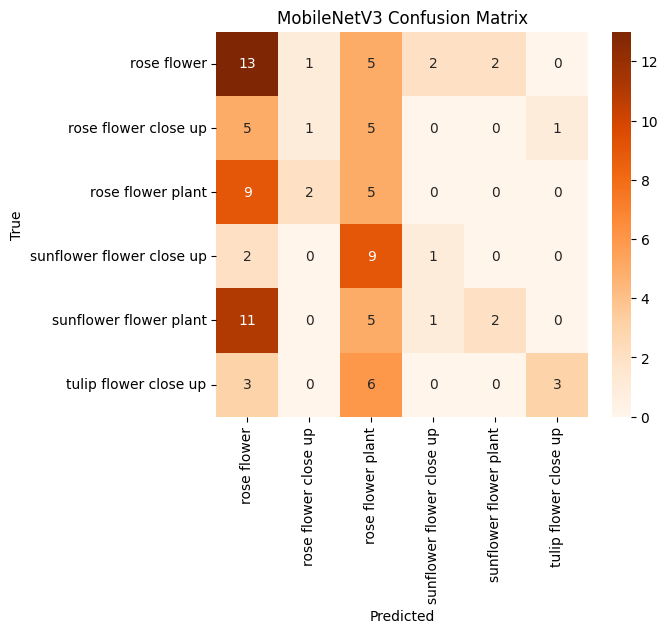

In [ ]:
mobilenet_loss, mobilenet_acc = model_mobilenet.evaluate(test_data)
print(f"MobileNetV3 Test Accuracy: {mobilenet_acc*100:.2f}%")

y_pred_mobilenet = model_mobilenet.predict(test_data)
y_pred_mobilenet_labels = np.argmax(y_pred_mobilenet, axis=1)

mobilenet_map = average_precision_score(
    tf.keras.utils.to_categorical(y_true),
    y_pred_mobilenet,
    average="macro"
)

print(f"MobileNetV3 mAP: {mobilenet_map:.4f}")

cm_mobilenet = confusion_matrix(y_true, y_pred_mobilenet_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm_mobilenet, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Oranges")
plt.title("MobileNetV3 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import matplotlib.pyplot as plt


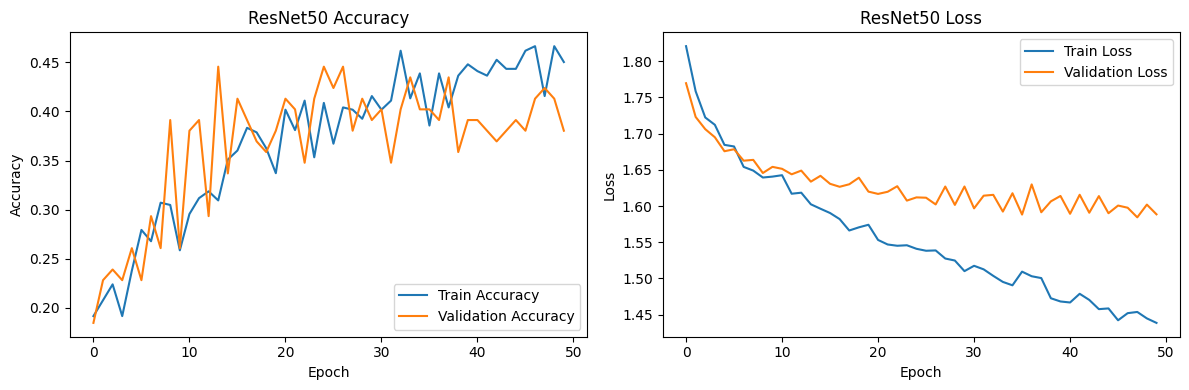

In [ ]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


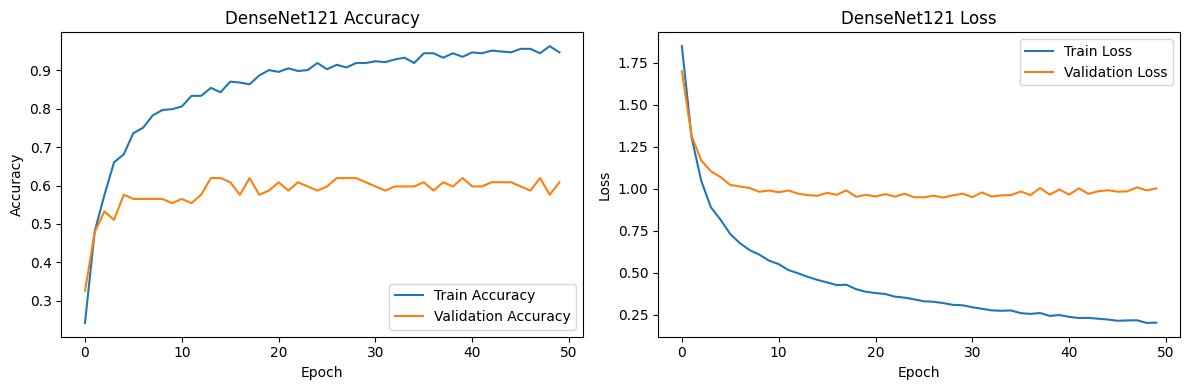

In [ ]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_densenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('DenseNet121 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_densenet.history['loss'], label='Train Loss')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss')
plt.title('DenseNet121 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


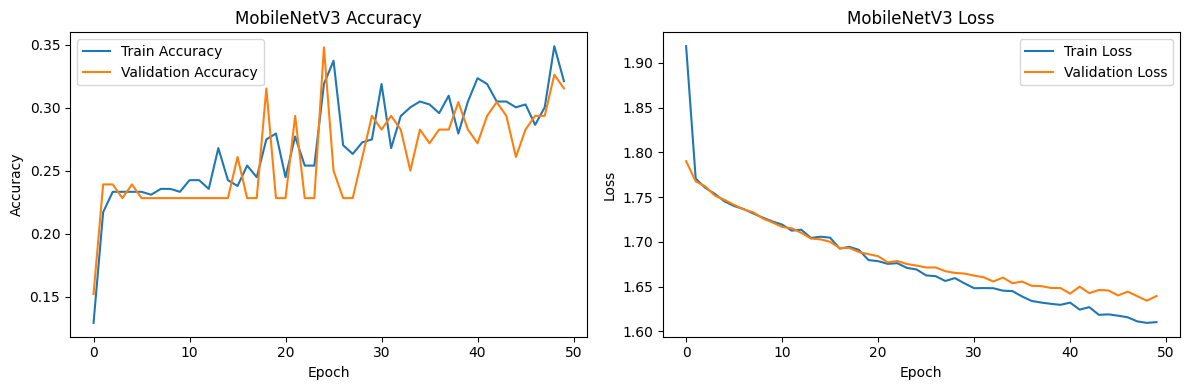

In [ ]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV3 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV3 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
